In [1]:
'''
Use gradient descent to find the minimum value of a single-variable function.
Equation: x**5 - 30*x**3 + 50*x; bounded range (-1,1)
'''
from sympy import Derivative, Symbol, sympify
import matplotlib.pyplot as plt

In [2]:
def grad_descent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
    
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
    return x_new

In [3]:
def plot_descent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
    
    x_new_tracker = list()
    
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
        x_new_tracker.append(x_new)
    return x_new_tracker

Enter a function in one variable:  x**5 - 30*x**3 + 50*x
Enter the variable to differentiate with respect to:  x
Enter the initial value of the variable:  0.5


x: -0.757451948244346
Minimum value: -25.0846622548143


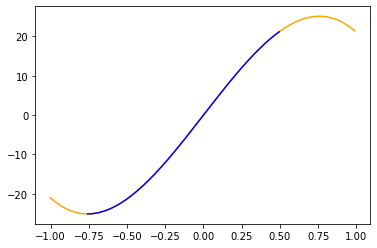

In [4]:
if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_descent(var0, d, var)
    print('{0}: {1}'.format(var.name, var_max))
    print('Minimum value: {0}'.format(f.subs({var:var_max})))
    
    # plot original function
    func_x = list()
    func_y = list()
    num = -1
    while num <= 1:
        func_x.append(num)
        func_y.append(f.evalf(subs={'x':num}))
        num+=0.01
    
    plt.plot(func_x, func_y, color = 'orange')
    
    # determine points used to find minimum and plot on top of original function
    x_points = plot_descent(var0, d, var)
    y_points = list()
    for point in x_points:
        y_points.append(f.subs({var:point}))
        
    plt.plot(x_points, y_points, color='blue')
    
    plt.show()